### Setup Notebook Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Load and Explore the Dataset

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: >

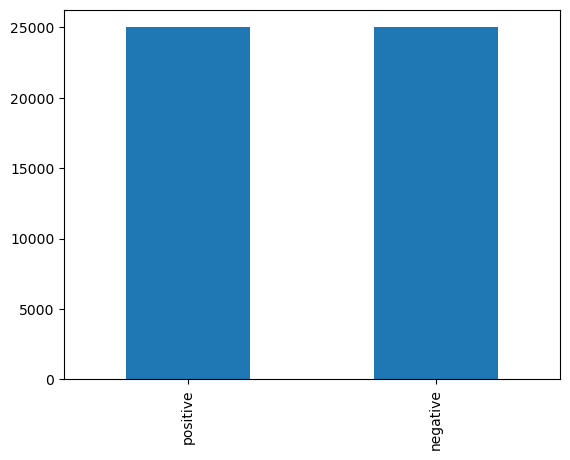

In [5]:
df['sentiment'].value_counts().plot(kind='bar')

### Data Preprocessing

Text Cleaning: Clean the review texts by removing unnecessary characters, HTML tags, etc. We define a function to automate this process.

Tokenization and Vectorization: Convert the text data into numerical vectors. TF-IDF vectorization is a common approach for this.

In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(df['review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

### Model Training and Evaluation

In [7]:
# Split the Data: Split your data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model: Use LogisticRegression from scikit-learn to train model.
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the Model: After training, evaluate model's performance on the test set.
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Gradient Descent Implementation

Define the Sigmoid Function: Logistic regression uses the sigmoid function to make predictions.

In [12]:
import numpy as np
def sigmoid(z):
    return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))

Cost Function: Define the binary cross-entropy loss function

In [13]:
def compute_cost(X, y, weights):
    m = len(y)
    y_pred = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

Gradient Descent Function: Implement the gradient descent algorithm.

In [14]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (y_pred - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

Initialize the weights (parameters) for your logistic regression model. This can be a NumPy array of zeros.

In [15]:
weights = np.zeros(X.shape[1])

Run the Gradient Descent:

Call the gradient_descent function with your data, initial weights, a chosen learning rate, and the number of iterations.

In [ ]:
learning_rate = 0.01
iterations = 1000
final_weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence of the Gradient Descent')